 # The following ML model tries to predict the survivability of lung cancer using information like the current stage the patient is at, their smoking status, if there were any family members that had cancer, if they had asthma, the treatment type they had and if they had any other type of cancer before.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11200 entries, 37399 to 20686
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   cancer_stage    11200 non-null  int64
 1   smoking_status  11200 non-null  int64
 2   family_history  11200 non-null  int64
 3   asthma          11200 non-null  int64
 4   treatment_type  11200 non-null  int64
 5   other_cancer    11200 non-null  int64
dtypes: int64(6)
memory usage: 870.5 KB


In [3]:
data  = pd.read_csv('lung_cancer_mortality_data_small.csv')
data.head()


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Croatia,2016-04-05,Stage I,Yes,Current Smoker,27.3,196,0,1,0,0,Radiation,2018-01-09,0
1,2,50.0,Female,Italy,2023-04-20,Stage III,No,Passive Smoker,22.4,234,1,1,1,0,Chemotherapy,2023-11-28,0
2,3,65.0,Male,Slovakia,2023-04-05,Stage IV,No,Former Smoker,20.2,210,0,0,0,0,Chemotherapy,2025-01-12,0
3,4,51.0,Female,Greece,2016-02-05,Stage III,Yes,Never Smoked,41.8,262,1,0,1,0,Surgery,2016-11-14,0
4,5,37.0,Female,Slovakia,2023-11-29,Stage III,Yes,Passive Smoker,33.5,262,0,0,0,0,Chemotherapy,2025-03-10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  56000 non-null  int64  
 1   age                 56000 non-null  float64
 2   gender              56000 non-null  object 
 3   country             56000 non-null  object 
 4   diagnosis_date      56000 non-null  object 
 5   cancer_stage        56000 non-null  object 
 6   family_history      56000 non-null  object 
 7   smoking_status      56000 non-null  object 
 8   bmi                 56000 non-null  float64
 9   cholesterol_level   56000 non-null  int64  
 10  hypertension        56000 non-null  int64  
 11  asthma              56000 non-null  int64  
 12  cirrhosis           56000 non-null  int64  
 13  other_cancer        56000 non-null  int64  
 14  treatment_type      56000 non-null  object 
 15  end_treatment_date  56000 non-null  object 
 16  surv

In [5]:
data.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [6]:
def change(x):
    if x =='Stage I':
        return 1
    elif x =='Stage II':
        return 2
    elif x =='Stage III':
        return 3
    elif x =='Stage IV':
        return 4
    

1


In [7]:
data['cancer_stage'] = data['cancer_stage'].apply(change)

In [8]:
data['cancer_stage']

0        1
1        3
2        4
3        3
4        3
        ..
55995    3
55996    4
55997    2
55998    3
55999    1
Name: cancer_stage, Length: 56000, dtype: int64

In [9]:
def smoker(x):
    if x =='Never Smoked':
        return 0
    elif x =='Former Smoker':
        return 1
    elif x =='Passive Smoker':
        return 2
    else:
        return 3
data['smoking_status'] = data['smoking_status'].apply(smoker)

In [10]:
data['smoking_status']

0        3
1        2
2        1
3        0
4        2
        ..
55995    0
55996    3
55997    2
55998    1
55999    2
Name: smoking_status, Length: 56000, dtype: int64

In [30]:
def history(x):
    if x =='Yes':
        return 1
    else:
        return 2
data['family_history'] = data['family_history'].apply(history)



In [31]:
data['family_history']

0        1
1        2
2        2
3        1
4        1
        ..
55995    1
55996    1
55997    1
55998    2
55999    1
Name: family_history, Length: 56000, dtype: int64

In [43]:
def treatment(x):
    if x =='Chemotherapy':
        return 1
    elif x =='Radiation':
        return 2
    elif x =='Surgery':
        return 3
    else:
        return 4
    


In [44]:
data['treatment_type'] = data['treatment_type'].apply(treatment)

In [45]:
data['treatment_type'] 

0        2
1        1
2        1
3        3
4        1
        ..
55995    3
55996    4
55997    2
55998    2
55999    2
Name: treatment_type, Length: 56000, dtype: int64

In [137]:
data = data.drop(['id'], axis = 1)

KeyError: "['id'] not found in axis"

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 56000 non-null  float64
 1   gender              56000 non-null  object 
 2   country             56000 non-null  object 
 3   diagnosis_date      56000 non-null  object 
 4   cancer_stage        56000 non-null  int64  
 5   family_history      56000 non-null  int64  
 6   smoking_status      56000 non-null  int64  
 7   bmi                 56000 non-null  float64
 8   cholesterol_level   56000 non-null  int64  
 9   hypertension        56000 non-null  int64  
 10  asthma              56000 non-null  int64  
 11  cirrhosis           56000 non-null  int64  
 12  other_cancer        56000 non-null  int64  
 13  treatment_type      56000 non-null  int64  
 14  end_treatment_date  56000 non-null  object 
 15  survived            56000 non-null  int64  
dtypes: f

In [14]:
colheaders = data.columns.values
colheaders

array(['age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer',
       'treatment_type', 'end_treatment_date', 'survived'], dtype=object)

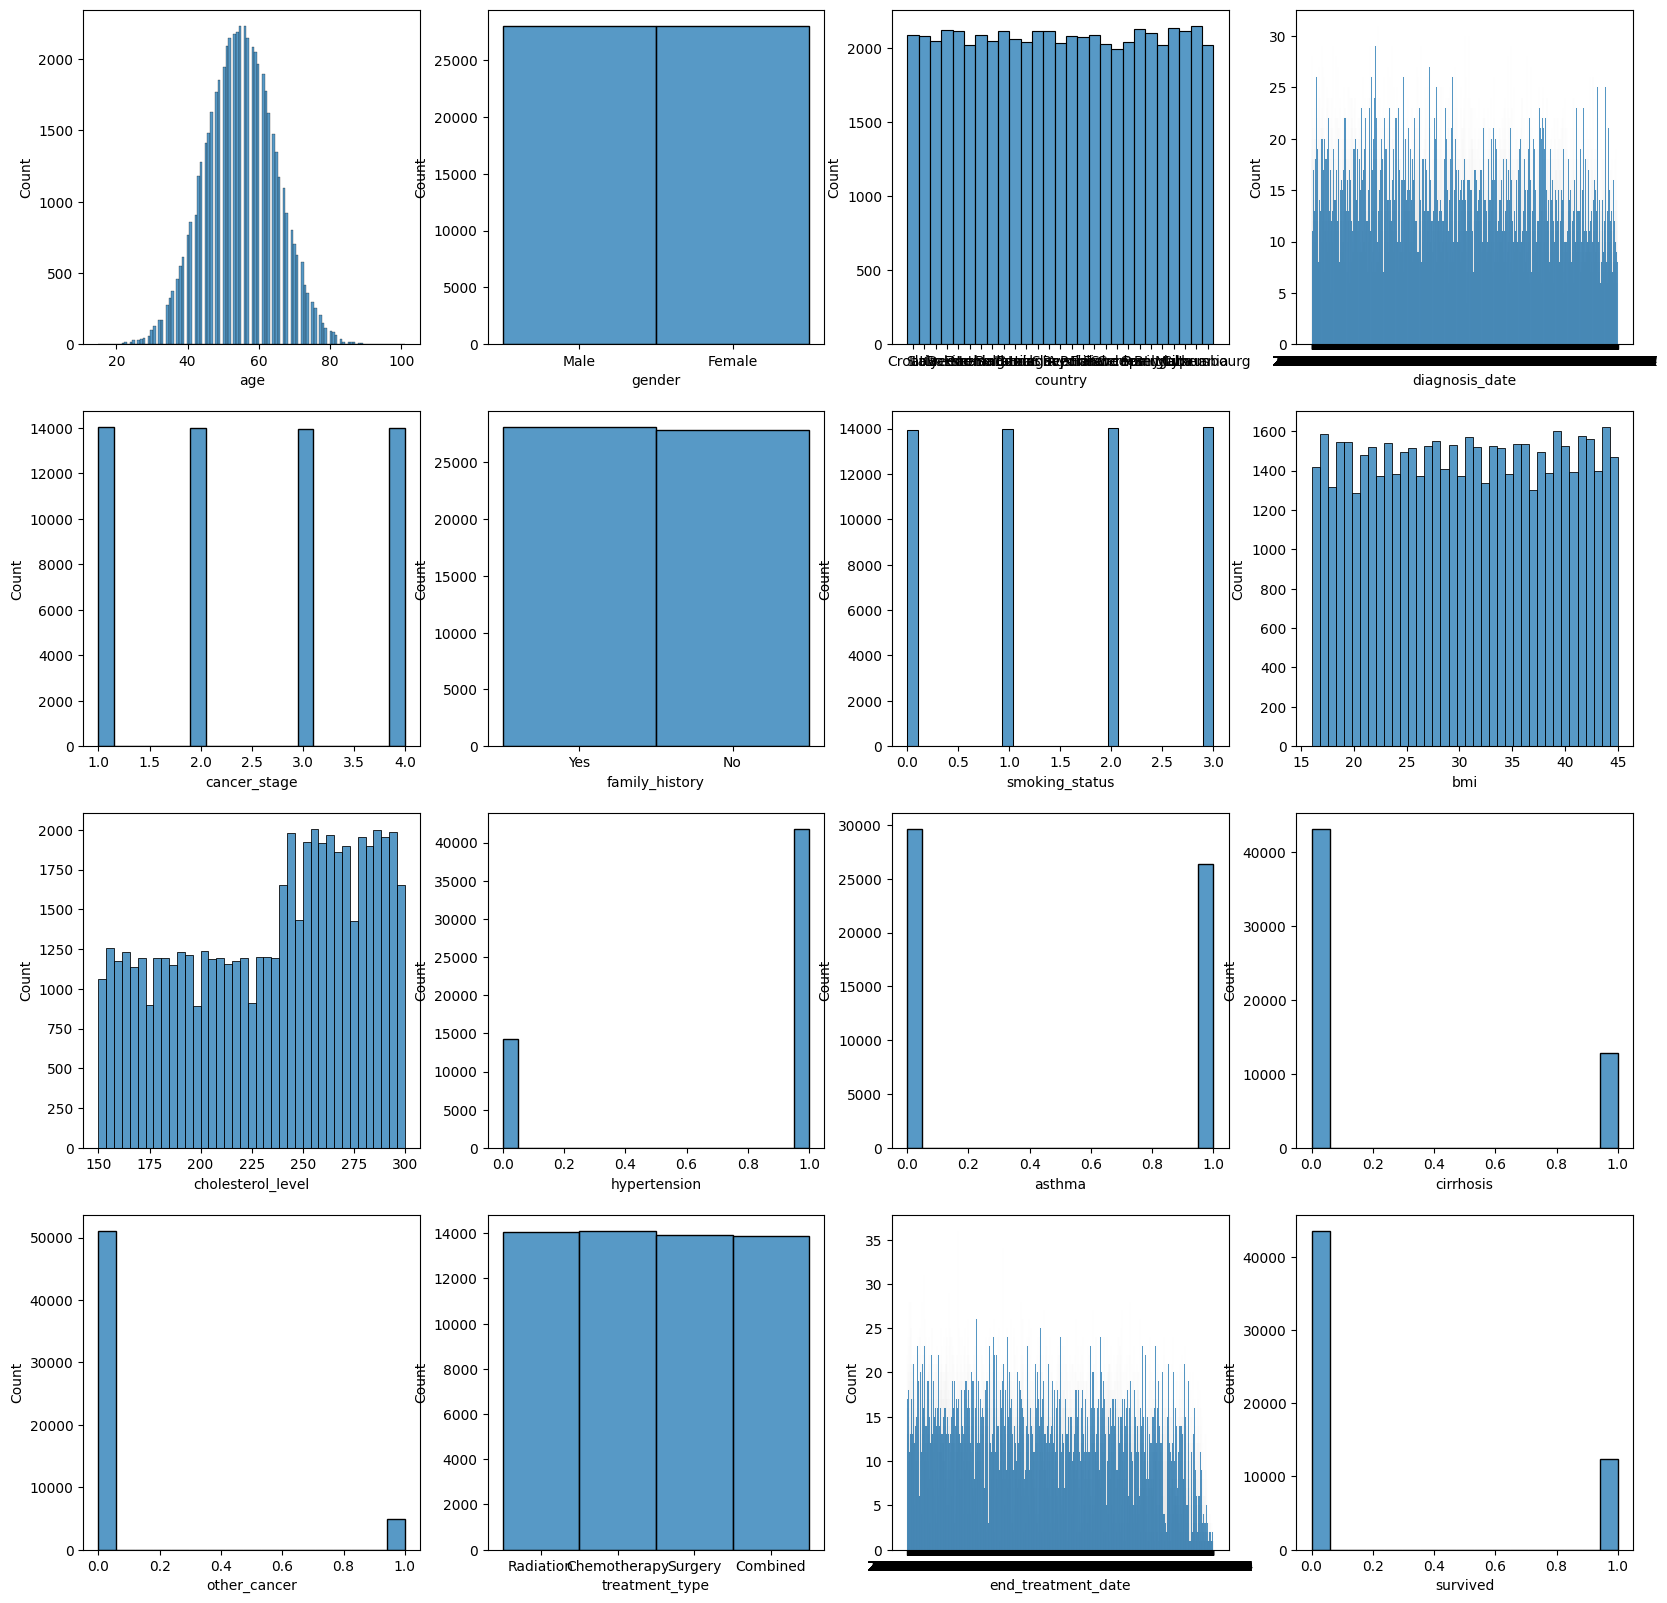

In [18]:
i = 1
fig, ax = plt.subplots(4,4, figsize = (20,20))

for col in colheaders:
    plt.subplot(4,4,i)
    sns.histplot(data=data[col])
    i = i+1



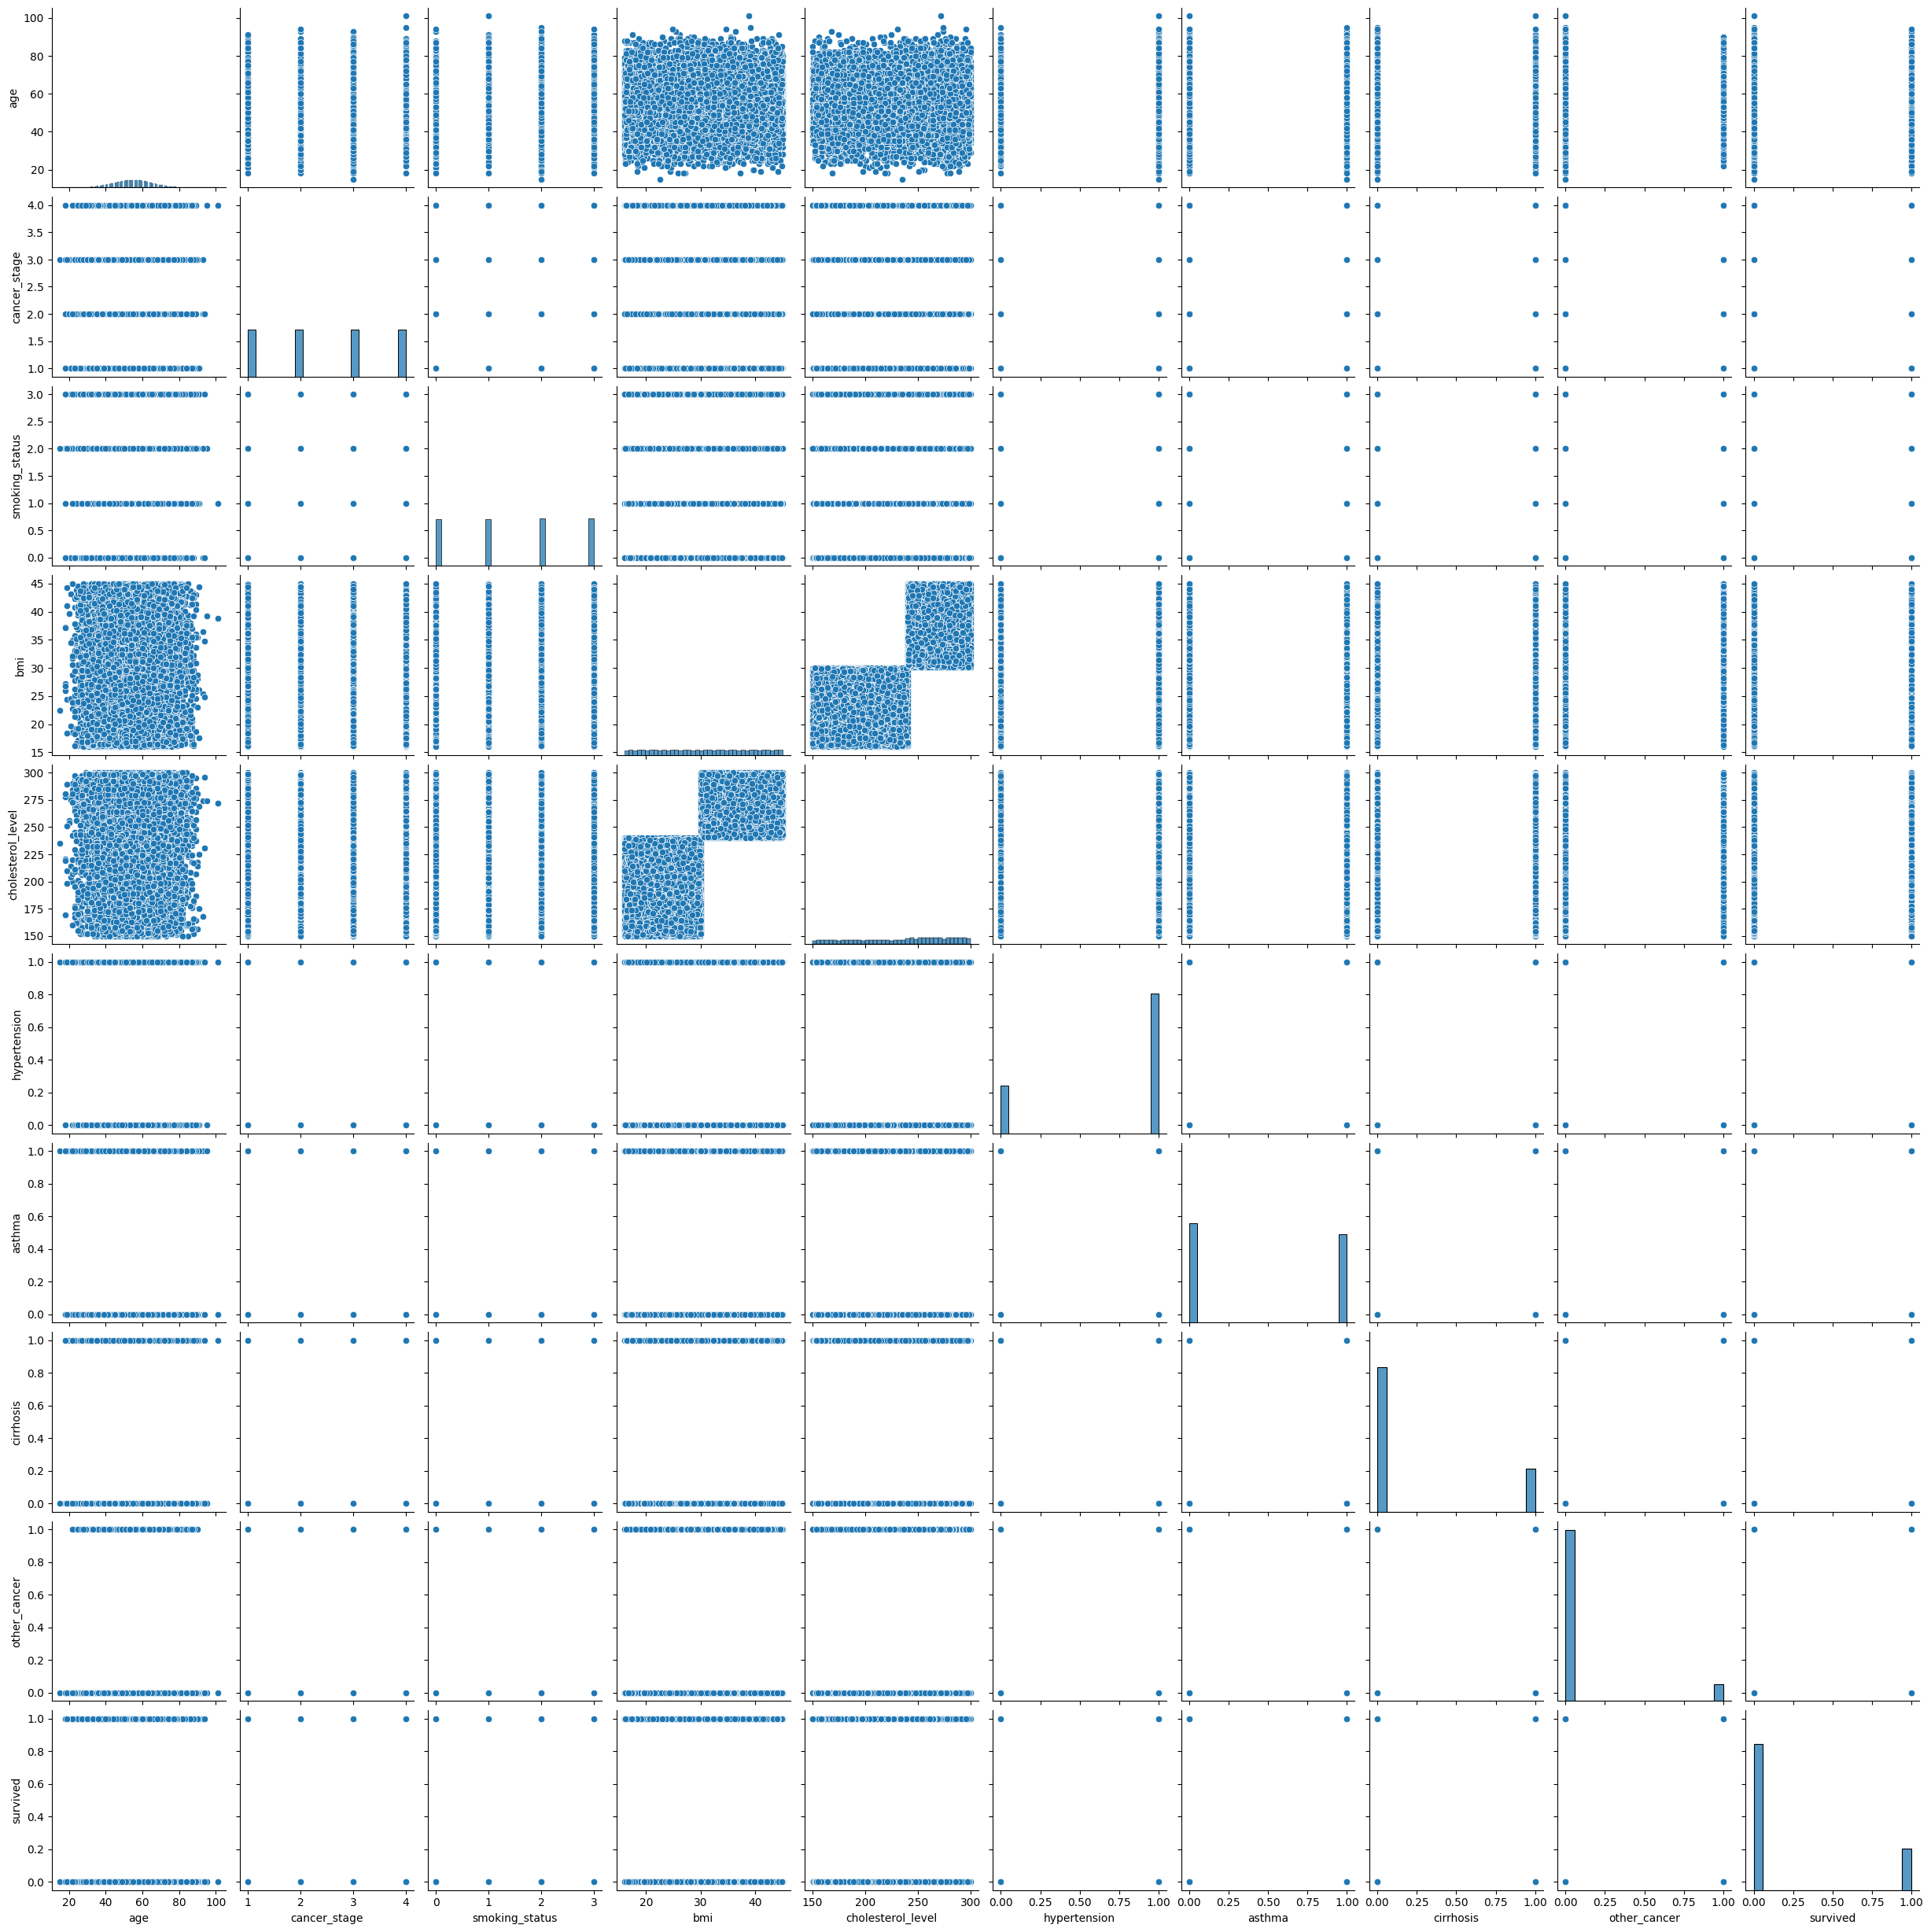

In [19]:
sns.pairplot(data=data)

<Axes: >

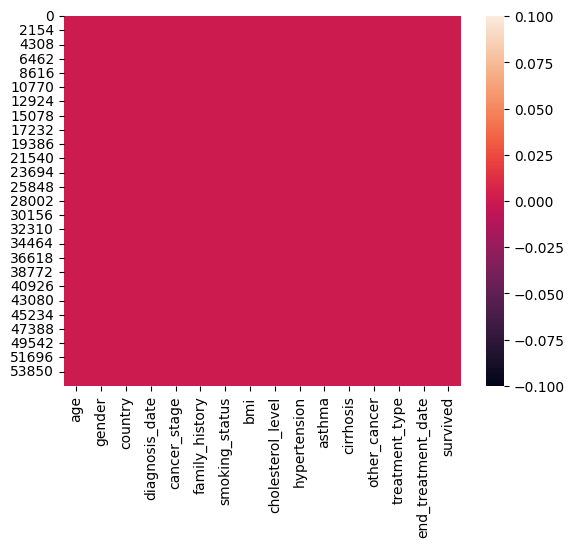

In [20]:
sns.heatmap(data.isna())

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 56000 non-null  float64
 1   gender              56000 non-null  object 
 2   country             56000 non-null  object 
 3   diagnosis_date      56000 non-null  object 
 4   cancer_stage        56000 non-null  int64  
 5   family_history      56000 non-null  int64  
 6   smoking_status      56000 non-null  int64  
 7   bmi                 56000 non-null  float64
 8   cholesterol_level   56000 non-null  int64  
 9   hypertension        56000 non-null  int64  
 10  asthma              56000 non-null  int64  
 11  cirrhosis           56000 non-null  int64  
 12  other_cancer        56000 non-null  int64  
 13  treatment_type      56000 non-null  int64  
 14  end_treatment_date  56000 non-null  object 
 15  survived            56000 non-null  int64  
dtypes: f

In [62]:
x = data[['cancer_stage', 'smoking_status', 'family_history','asthma','treatment_type', 'other_cancer']]
x

,cancer_stage,smoking_status,family_history,asthma,treatment_type,other_cancer
0,1,3,1,1,2,0
1,3,2,2,1,1,0
2,4,1,2,0,1,0
3,3,0,1,0,3,0
4,3,2,1,0,1,0
...,...,...,...,...,...,...
55995,3,0,1,0,3,0
55996,4,3,1,0,4,0
55997,2,2,1,0,2,0
55998,3,1,2,0,2,0


In [63]:
y = data['survived']

In [64]:
y

0        0
1        0
2        0
3        0
4        0
        ..
55995    0
55996    0
55997    1
55998    0
55999    0
Name: survived, Length: 56000, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split


In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [67]:
x_train

,cancer_stage,smoking_status,family_history,asthma,treatment_type,other_cancer
51396,2,2,2,1,2,0
38726,2,2,2,0,1,0
36794,3,3,1,1,2,0
54254,2,1,1,0,4,0
37375,1,2,2,0,2,0
...,...,...,...,...,...,...
50401,1,0,1,0,1,1
37980,4,1,2,1,1,0
51016,4,0,2,1,3,0
15123,4,0,1,1,1,0


In [68]:
y_train

51396    0
38726    0
36794    0
54254    0
37375    1
        ..
50401    1
37980    0
51016    1
15123    0
55275    0
Name: survived, Length: 44800, dtype: int64

In [69]:
from sklearn.linear_model import LinearRegression
regressor  = LinearRegression(fit_intercept=True)
regressor.fit(x_train, y_train)

LinearRegression()

In [70]:
print('coeff M', regressor.coef_)
print('Coeff b', regressor.intercept_)

coeff M [-0.00056604  0.00025975 -0.00806332 -0.00092895 -0.00224738  0.00168223]
Coeff b 0.24151551123117793


In [71]:
ypre = regressor.predict(x_test)

In [73]:
ypre

array([0.21919597, 0.22894063, 0.21997523, ..., 0.21767124, 0.22354379,
       0.23115827])

In [92]:

for i in range(len(ypre)):
    if ypre[i] > 0.5:
        ypre[i] = 1
    else:
        ypre[i] = 0 
        

In [93]:
y_test

37399    0
868      0
16455    0
17674    1
19158    1
        ..
54018    0
16715    0
46203    1
53329    0
20686    0
Name: survived, Length: 11200, dtype: int64

In [76]:
ypre

array([0., 0., 0., ..., 0., 0., 0.])

In [79]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt


In [80]:
k = x_test.shape[1]
n = len(x_test)

In [81]:
k



6

In [82]:
n

11200

In [83]:
rmse = float(format(np.sqrt(mean_squared_error(y_test, ypre)), '.3f'))
mse = mean_squared_error(y_test, ypre)
mae = mean_absolute_error(y_test, ypre)
r2 = r2_score(y_test, ypre)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)


print('\nrmse = ', rmse, '\n mse = ', mse , '\n mae = ', mae , ' \nr2 = ', r2, '\n adjusted r2 = ',adj_r2)




rmse =  0.469 
 mse =  0.22035714285714286 
 mae =  0.22035714285714286  
r2 =  -0.28263857077416454 
 adjusted r2 =  -0.2833261283033921


In [141]:
data.loc[52997]

age                         57.0
gender                    Female
country                  Romania
diagnosis_date        2015-07-16
cancer_stage                   4
family_history                 2
smoking_status                 1
bmi                         21.6
cholesterol_level            233
hypertension                   0
asthma                         1
cirrhosis                      0
other_cancer                   0
treatment_type                 4
end_treatment_date    2016-05-05
survived                       0
Name: 52997, dtype: object

In [142]:
# x = [['cancer_stage', 'smoking_status', 'family_history','asthma','treatment_type', 'other_cancer']]

x = [[4, 1, 2, 1, 4,0]]
y = regressor.predict(x)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [143]:
if y< 0.5:
    print(0)
else:
    print( 1) 

0
